## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people, one group follows the first diet and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

# Hypothesis testing problems

In [2]:
#importamos modulos necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

#datos del estudio
diet_1 = [2, 2.5, 3, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3, 3.2, 3.1, 2.9, 2.8, 3, 3.2]

# Premisas:
# H0 : No hay una diferencia significativa en el promedio de perdida de peso entre los individuos que siguieron la dieta 1 y los que siguieron la dieta 2.
# H1 : La perdida de peso promedio ha sido sgnificativamnte diferente entre las dos dietas 
# Establecemos el nivel de significancia (α) en 0.05

#Aplicamos el test T de Student
t_stat, p_value = ttest_ind(diet_2, diet_1)

#imprimimos resultados y conclusiones
print(f'''T-statistic value: {t_stat})  
P-Value: {p_value}
Puesto que el PValue esta por debajo del nivel de significancia preestablecido podemos rechazar la hipotesis nula
y concluir que hay suficiente evidencia estadística como para considerar que los resultados obtenidos no se deben al azar
y son estadisticamente relevantes.''')

T-statistic value: 3.5383407969933938)  
P-Value: 0.004083270191713912
Puesto que el PValue esta por debajo del nivel de significancia preestablecido podemos rechazar la hipotesis nula
y concluir que hay suficiente evidencia estadística como para considerar que los resultados obtenidos no se deben al azar
y son estadisticamente relevantes


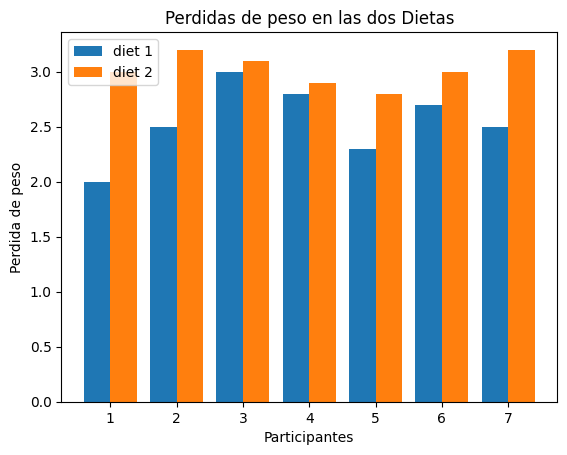

In [19]:
#Graficamos los datos
x = np.arange(1, 8)
  
X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, diet_1, 0.4, label = 'diet 1') 
plt.bar(X_axis + 0.2, diet_2, 0.4, label = 'diet 2') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Participantes") 
plt.ylabel("Perdida de peso") 
plt.title("Perdidas de peso en las dos Dietas") 
plt.legend() 
plt.show()

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically are:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

### Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

In [4]:
#Creamos arrays de datos
fertilizante_1 = np.array([20, 21, 20, 19, 20])
fertilizante_2 = np.array([22, 21, 23, 22, 21])
fertilizante_3 = np.array([24, 23, 22, 23, 24])


,fertilizante 1,fertilizante 2,fertilizante 3
0,20,22,24
1,21,21,23
2,20,23,22
3,19,22,23
4,20,21,24


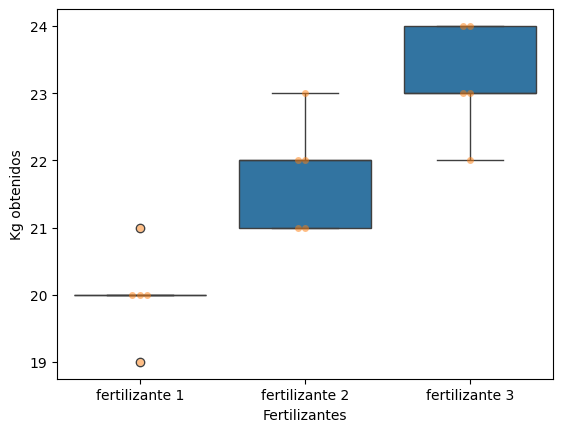

In [9]:
import seaborn as sns
df_melted = pd.melt(df, var_name='Fertilizantes', value_name='Kg obtenidos')

#Grafico de cajas para ver la distribucion general de los datos y posibles outliers
sns.boxplot(x="Fertilizantes", y="Kg obtenidos", data=df_melted)

#grafico de violin muestra la distribucion de valores dentro de un grafico de cajas
sns.swarmplot(x="Fertilizantes", y="Kg obtenidos", data=df_melted, alpha = 0.5)

#Mostramos grafico
plt.show()

In [10]:
#importamos modulos necesarios para los tests
import statsmodels
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Premisas:
# H0 : No hay una diferencia significativa entre la media de kilogramos obtenidos por cada fertilizante.
# H1 : Al menos uno de los fertilizantes tiene una media significativamente superior a las demas.
# Establecemos el nivel de significancia (α) en 0.05

#Aplicamos Test anova
t_stat, p_value = f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)

# Resultados y conclusiones
print(f'P-Value: {p_value}')
print('''El Pvalue esta por debajo de α por lo que podemos concluir que
la media de al menos uno de los fertilizantes en significativamente diferente de las demas.''')

P-Value: 0.00014047824793190475
El Pvalue esta por debajo de α por lo que podemos concluir que
la media de al menos uno de los fertilizantes en significativamente diferente de las demas


### Test de Tukey
Ahora usaremos el test de Tukey para determinar exactamente qué pares de grupos difieren entre sí. 

In [15]:
#Creamos dataframe con los datos
df = pd.DataFrame({'fertilizante 1' : fertilizante_1, 'fertilizante 2': fertilizante_2, 'fertilizante 3': fertilizante_3})

#Usamos el metodo melt() para crear un dataframe que contenga solo las columnas 'fertilizantes' y 'kg obtenidos' (lo requiere pairwise_tukeyhsd())
df_melted = pd.melt(df, var_name='Fertilizantes', value_name='Kg obtenidos')

#Aplicamos test de Tukey
result = pairwise_tukeyhsd(df_melted['Kg obtenidos'], df_melted['Fertilizantes'])
#Printamos el resultado y conclusiones
print(result)
print('''- Entre "fertilizante 1" y "fertilizante 2", la diferencia de medias es de 1.8 unidades, con un p-valor de 0.0099, 
  lo que indica una diferencia significativa.
- Entre "fertilizante 1" y "fertilizante 3", la diferencia de medias es aún mayor, 3.2 unidades, con un p-valor aún más bajo (0.0001),
  indicando una diferencia muy significativa.
- Entre "fertilizante 2" y "fertilizante 3" muestra una diferencia de medias de 1.4 unidades con un p-valor de 0.0409
  (justo por debajo del alpha definido), indicando que esta diferencia también es significativa, pero con menos certeza.
- Los PValues ajustados de cada comparacion estan por debajo de α por lo que podemos rechazar la hipotesis nula y afirmar 
  con certeza que con el fertilizante 3 se ha producido una media de kilogramos mayor que con los demas''')

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower  upper  reject
------------------------------------------------------------------
fertilizante 1 fertilizante 2      1.8 0.0099 0.4572 3.1428   True
fertilizante 1 fertilizante 3      3.2 0.0001 1.8572 4.5428   True
fertilizante 2 fertilizante 3      1.4 0.0409 0.0572 2.7428   True
------------------------------------------------------------------
- Entre "fertilizante 1" y "fertilizante 2", la diferencia de medias es de 1.8 unidades, con un p-valor de 0.0099, 
  lo que indica una diferencia significativa.
- Entre "fertilizante 1" y "fertilizante 3", la diferencia de medias es aún mayor, 3.2 unidades, con un p-valor aún más bajo (0.0001),
  indicando una diferencia muy significativa.
- Entre "fertilizante 2" y "fertilizante 3" muestra una diferencia de medias de 1.4 unidades con un p-valor de 0.0409
  (justo por debajo del alpha definido), indicando que esta diferencia

### PRACTICAS SUPLEMENTARIAS 
Test de normalidad

In [21]:
#Importamos los modulos necesarios para las pruebas
from scipy import stats
from scipy.stats import normaltest, levene, ttest_1samp
import random 

statistic value: 0.1258644025961233
P-Value: 0.9390071349958955
statistic value: 1.9669815117718545
P-Value: 0.37400326341918533
statistic value: 1.0547599823617757
P-Value: 0.5901491418789537
Los valores del PValue por encima de 0.05 en este caso nos permiten quedarnos con la hipotesis nula o lo que es lo mismo
asumimos que la distribucion es normal


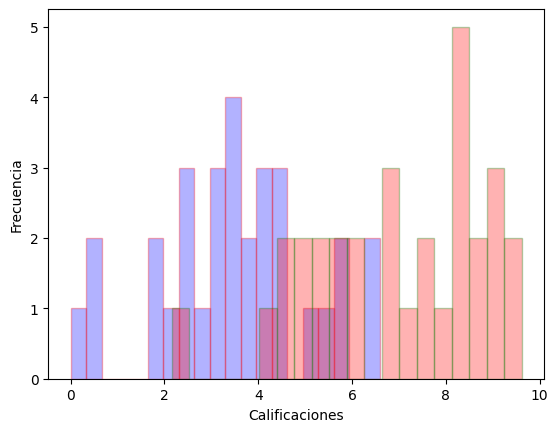

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de prueba // notas de alumnos de dos colegios
horas_estudio_grupo_1 = np.random.uniform(0, 20, 31)
horas_estudio_grupo_2 = np.random.uniform(3, 20, 31)
horas_estudio_poblacional = np.random.uniform(0, 20, 1000)

efecto_estudio1 = 0.25
efecto_estudio2 = 0.30

# np.clip ajusta las notas entre 0 y 10
calificaciones1 = np.clip(1 + efecto_estudio1 * horas_estudio_grupo_1 + np.random.normal(0, 1, 31), 0, 10)
calificaciones2 = np.clip(3 + efecto_estudio2 * horas_estudio_grupo_2 + np.random.normal(0, 1, 31), 0, 10)
# notas de una muestra poblacional
calificaciones_poblacional = np.clip(1 + efecto_estudio1 * horas_estudio_poblacional + np.random.normal(0, 2, 1000), 0, 10)



#Comprobamos si nuestros datos siguen una distribucion normal
 
#test de normalidad calificaciones1
statistic, p_value = stats.normaltest(calificaciones1)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
#test de normalidad calificaciones2
statistic, p_value = stats.normaltest(calificaciones2)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
#test de normalidad calificaciones_poblacional
statistic, p_value = stats.normaltest(calificaciones__poblacional)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
print('''Los valores del PValue por encima de 0.05 en este caso nos permiten quedarnos con la hipotesis nula o lo que es lo mismo
asumimos que la distribucion es normal''')
# Histograma de las calificaciones 
plt.hist(calificaciones1, bins=20, edgecolor='r',color='blue', alpha=0.3)
plt.hist(calificaciones2, bins=20, edgecolor='g',color='red', alpha=0.3)

plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.show()


In [85]:
# Test de Levene (stats.levene): Se utiliza para verificar si diferentes muestras tienen varianzas iguales.
# Utilizamos los mismos conjuntos de datos
statistic, p_value = stats.levene(calificaciones1, calificaciones2)
print(f'statistic value: {statistic}')  
print(f'P-Value: {p_value}')
#Un p-value alto indica que no hay evidencia suficiente para afirmar que las varianzas son diferentes

statistic value: 1.164300661874128
P-Value: 0.2848941201919388


In [86]:
from scipy.stats  import ttest_1samp
# ttest_1samp se utiliza para determinar si la media de una muestra difiere significativamente de una media teórica o poblacional conocida
media = np.mean(calificaciones__poblacional)
t_statistic, p_value = stats.ttest_1samp(calificaciones2, media)
print(f'statistic value: {t_statistic}')  
print(f'P-Value: {p_value}')
# Si el p-value es menor que un umbral (usualmente 0.05), entonces hay evidencia estadística suficiente para rechazar 
#la hipótesis nula de que la media de la muestra es igual a la media teórica, y aceptar que existe una diferencia significativa.

statistic value: 3.7649804850181203
P-Value: 0.0007252943695849848
